In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/fake-job/fake_job_postings.csv')

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#4.8 percent of fake jobs

--- Empty Frames ---
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


--- Counting our real and fake jobs ---
fraudulent
0    17014
1      866
Name: count, dtype: int64


-- no of real and fake jobs ---
fraudulent
0    17014
1      866
Name: count, dtype: int64
--- Graph ---


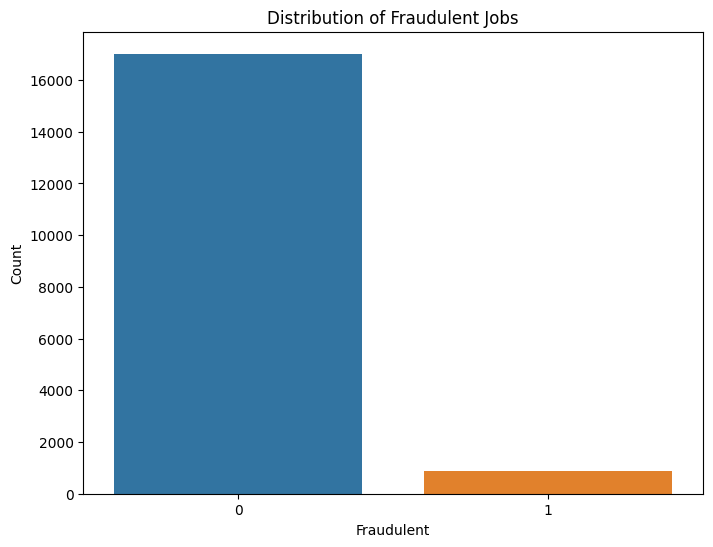

In [5]:
print("--- Empty Frames ---")
print(df.isnull().sum())
print("\n")

# Now, let's count how many real and fake jobs we have
print("--- Counting our real and fake jobs ---")
fraudulent_counts = df['fraudulent'].value_counts()
print(fraudulent_counts)
print("\n")

print("-- no of real and fake jobs ---")
fraudulet_counts = df['fraudulent'].value_counts()
print(fraudulet_counts)

print('--- Graph ---')
plt.figure(figsize=(8, 6))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Fraudulent Jobs')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()

In [6]:
#Salary range and department is missing a lot(15k and 11k resp.)
#data is imbalanced

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Graduates: English Teacher Abroad                      57
Customer Service Representative                        51
Administrative Assistant                               48
Product Manager                                        47
Office Manager                                         46
Marketing Manager                                      45
Customer

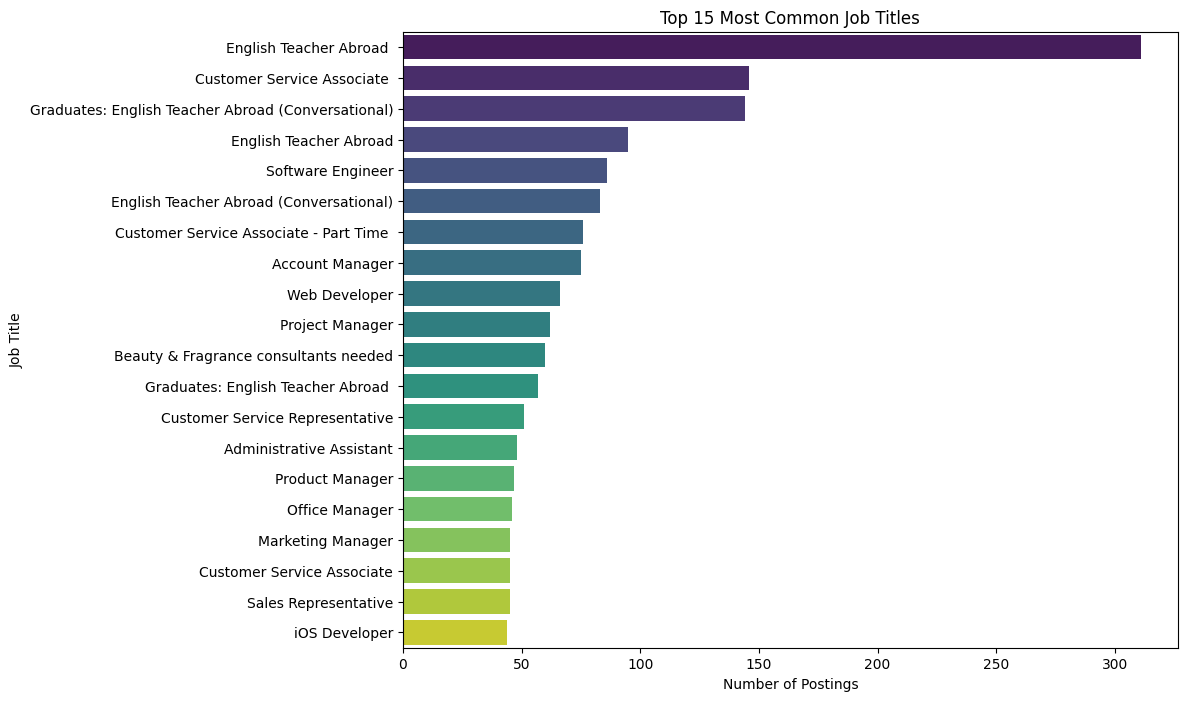

--- Percentage of Missing Data in Each Column ---
salary_range           83.959732
department             64.580537
required_education     45.329978
benefits               40.335570
required_experience    39.429530
function               36.101790
industry               27.421700
employment_type        19.412752
company_profile        18.501119
requirements           15.078300
location                1.935123
description             0.005593
dtype: float64




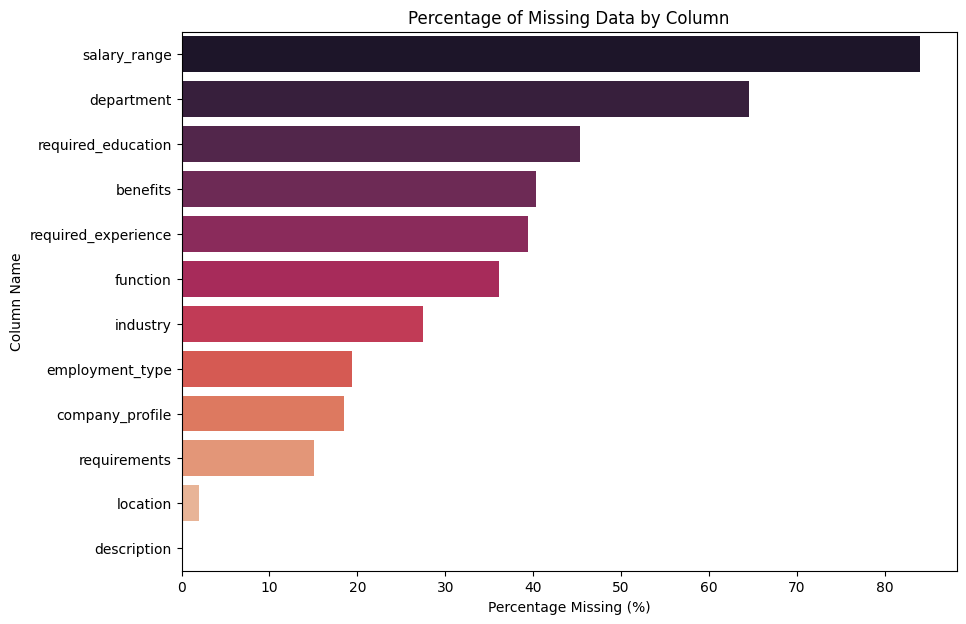

In [7]:
#job titles
common_titles = df['title'].value_counts().head(20)
print(common_titles)
#chart
plt.figure(figsize=(10, 8))
sns.barplot(x=common_titles.values, y=common_titles.index, palette='viridis')
plt.title('Top 15 Most Common Job Titles')
plt.xlabel('Number of Postings')
plt.ylabel('Job Title')
plt.show()

#missing data
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print("--- Percentage of Missing Data in Each Column ---")
print(missing_percentage)
print("\n")

#chart
plt.figure(figsize=(10, 7))
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, palette='rocket')
plt.title('Percentage of Missing Data by Column')
plt.xlabel('Percentage Missing (%)')
plt.ylabel('Column Name')
plt.show()


--- Counts for Each Employment Type ---
employment_type
Full-time    11620
Unknown       3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64




/tmp/ipykernel_13/2925959552.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['employment_type'].fillna('Unknown', inplace=True)


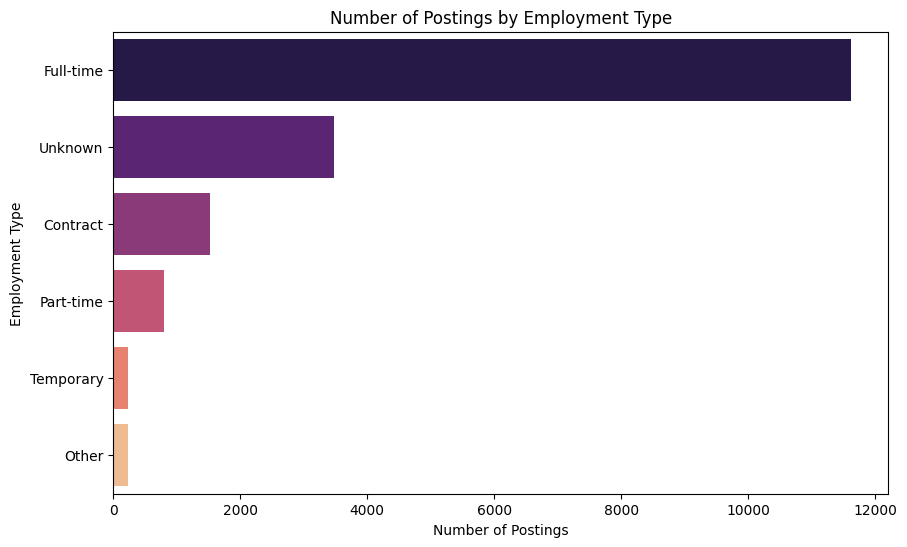

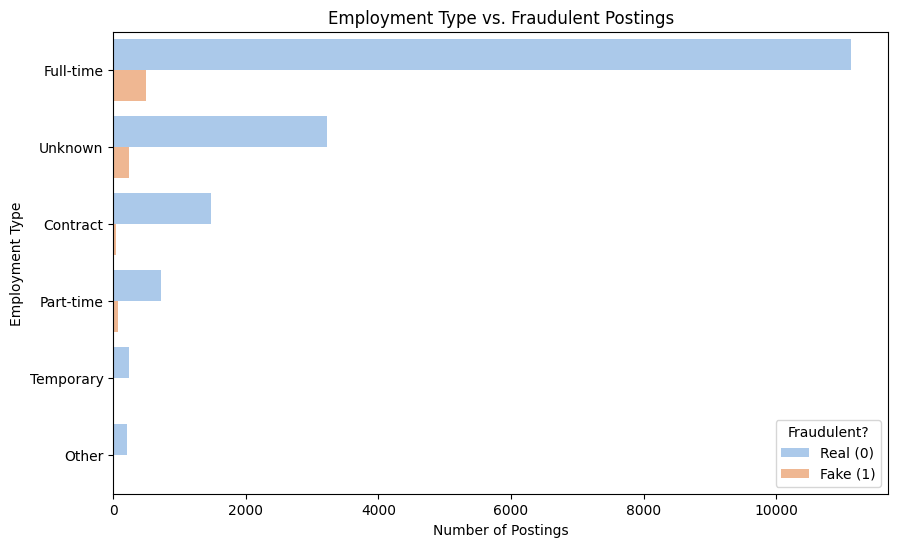

In [8]:
#replacing empty values with unknown
df['employment_type'].fillna('Unknown', inplace=True)

print("--- Counts for Each Employment Type ---")
print(df['employment_type'].value_counts())
print("\n")
#chart
plt.figure(figsize=(10, 6))
sns.countplot(y='employment_type', data=df, order=df['employment_type'].value_counts().index, palette='magma')
plt.title('Number of Postings by Employment Type')
plt.xlabel('Number of Postings')
plt.ylabel('Employment Type')
plt.show()
#chart (real and fake)
plt.figure(figsize=(10, 6))
sns.countplot(y='employment_type', data=df, order=df['employment_type'].value_counts().index, hue='fraudulent', palette='pastel')
plt.title('Employment Type vs. Fraudulent Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Employment Type')
plt.legend(title='Fraudulent?', labels=['Real (0)', 'Fake (1)'])
plt.show()

In [9]:
# Full-time has the most fake postings in total, that's mostly because there are so many full-time jobs.
#compared to full time (fake jobs) unknown type is founded on large proposition

/tmp/ipykernel_13/1636058776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['required_education'].fillna('Unknown', inplace=True)


--- Counts for Each Education Level ---
required_education
Unknown                              8105
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Name: count, dtype: int64




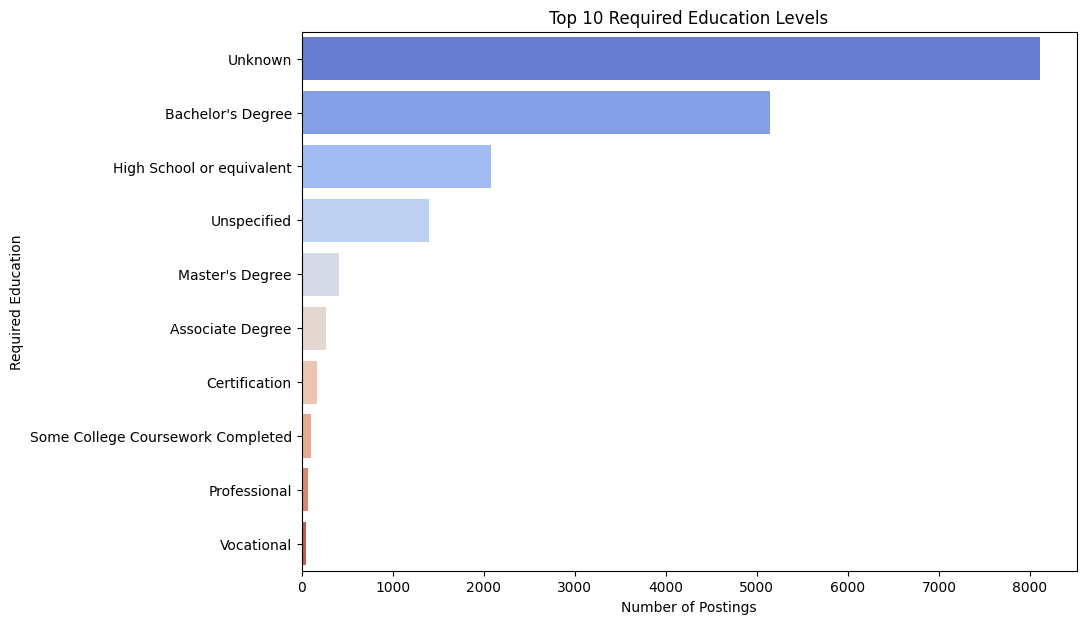

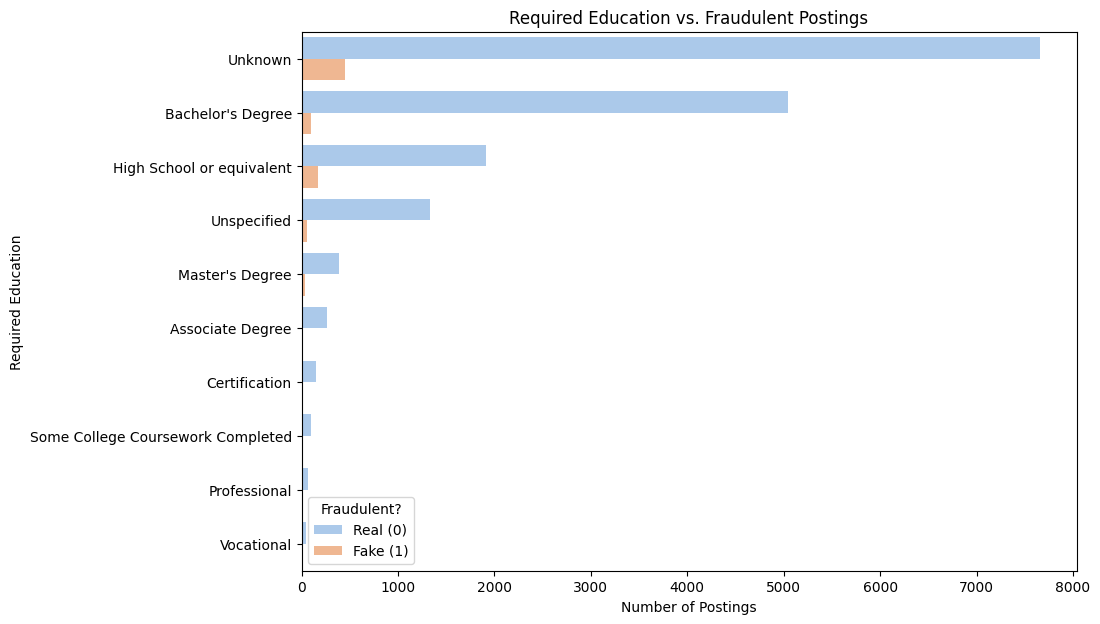


--- Counts for Each Experience Level ---
required_experience
Unknown             7050
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: count, dtype: int64




/tmp/ipykernel_13/1636058776.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['required_experience'].fillna('Unknown', inplace=True)


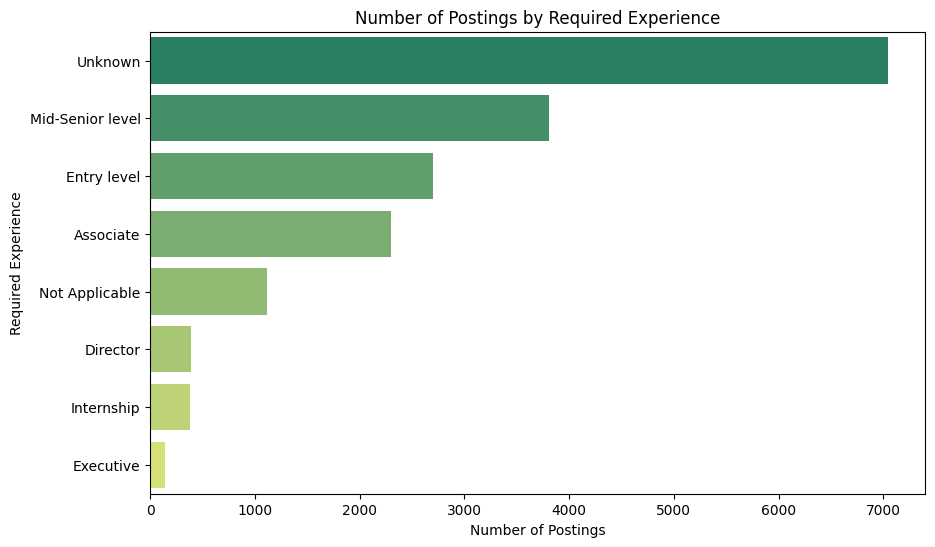

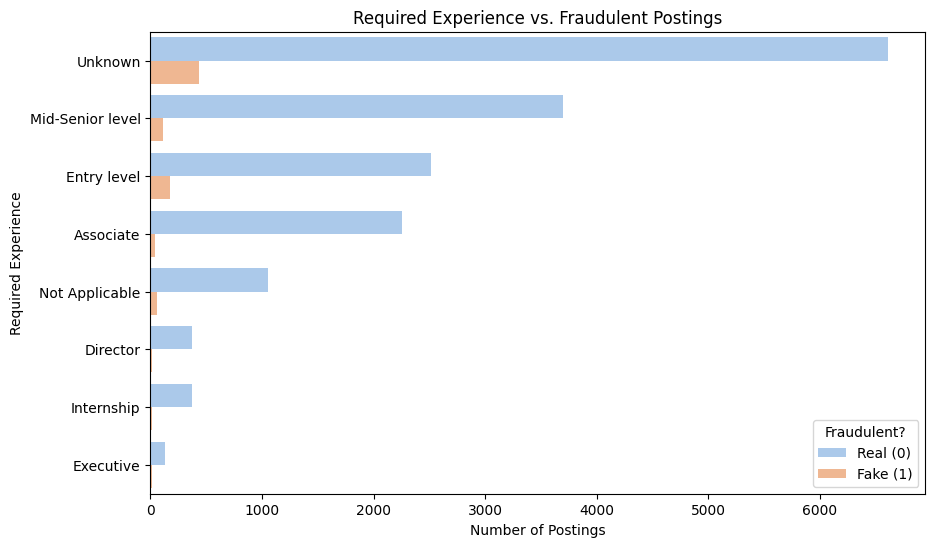

In [10]:
#Required Education
# First, let's fill in the empty spots
df['required_education'].fillna('Unknown', inplace=True)

# Let's see the counts for each education level
print("--- Counts for Each Education Level ---")
print(df['required_education'].value_counts().head(10)) # Showing top 10 to keep it tidy
print("\n")

# Let's make a plot to see the most common education levels
plt.figure(figsize=(10, 7))
sns.countplot(y='required_education', data=df, order=df['required_education'].value_counts().head(10).index, palette='coolwarm')
plt.title('Top 10 Required Education Levels')
plt.xlabel('Number of Postings')
plt.ylabel('Required Education')
plt.show()

# Now let's see the connection to fake jobs
plt.figure(figsize=(10, 7))
sns.countplot(y='required_education', data=df, order=df['required_education'].value_counts().head(10).index, hue='fraudulent', palette='pastel')
plt.title('Required Education vs. Fraudulent Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Required Education')
plt.legend(title='Fraudulent?', labels=['Real (0)', 'Fake (1)'])
plt.show()


#Required Experience

# First, let's fill in the empty spots
df['required_experience'].fillna('Unknown', inplace=True)

# Let's see the counts for each experience level
print("\n--- Counts for Each Experience Level ---")
print(df['required_experience'].value_counts())
print("\n")

#graph for experiences
plt.figure(figsize=(10, 6))
sns.countplot(y='required_experience', data=df, order=df['required_experience'].value_counts().index, palette='summer')
plt.title('Number of Postings by Required Experience')
plt.xlabel('Number of Postings')
plt.ylabel('Required Experience')
plt.show()

#graph for fake jobs
plt.figure(figsize=(10, 6))
sns.countplot(y='required_experience', data=df, order=df['required_experience'].value_counts().index, hue='fraudulent', palette='pastel')
plt.title('Required Experience vs. Fraudulent Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Required Experience')
plt.legend(title='Fraudulent?', labels=['Real (0)', 'Fake (1)'])
plt.show()

In [11]:
# 1. required Education
#The most common requirement is a Bachelor's Degree
#The "High School or equivalent" and "Bachelor's Degree" categories have a noticeable number of fake postings.
#But the most striking clue is that some postings requiring no specific education level (like "Unknown" or ones that are not in the top list) seem to have a higher proportion of fakes

In [12]:
# 2. Required Experinces
#most common experience level required is Mid-Senior level, followed by Entry level.
# fake postings appear across all experience levels,  quite common in the Entry level category.
#also, The "Unknown" category also has a visible amount of fake jobs.

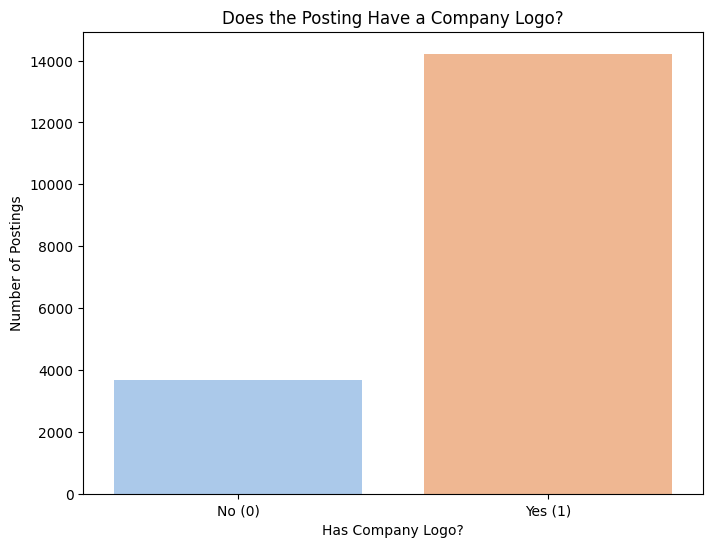

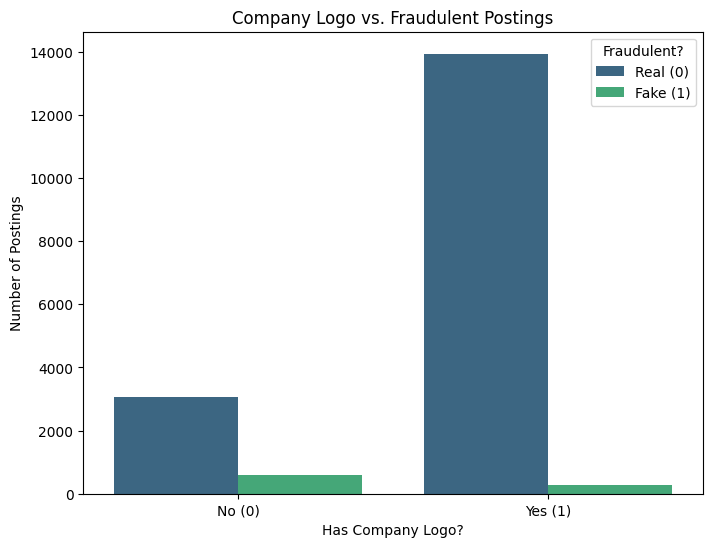

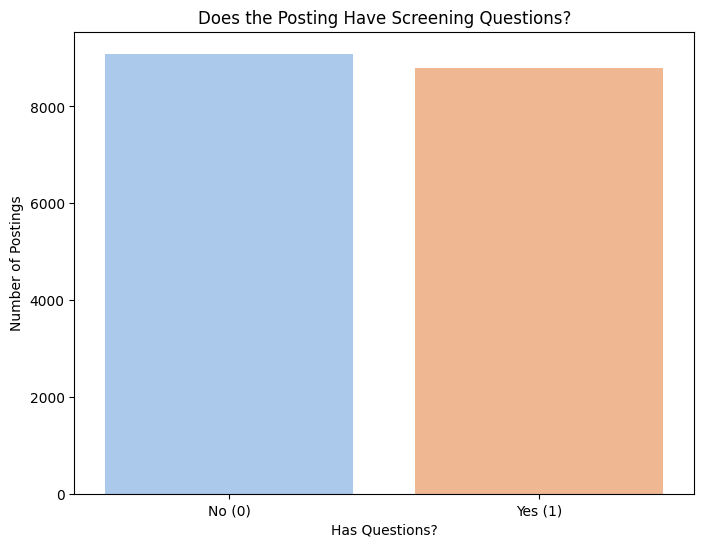

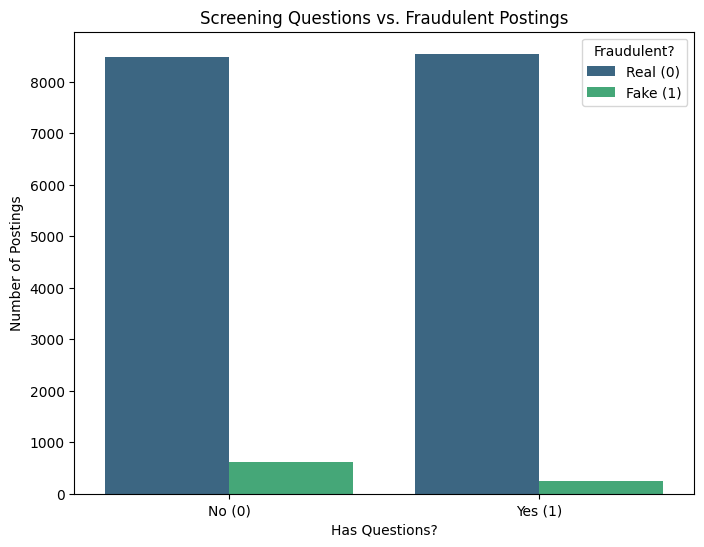

--- Actual Numbers: Company Logo vs. Fake Jobs ---
fraudulent            0    1
has_company_logo            
0                  3077  583
1                 13937  283


--- Actual Numbers: Screening Questions vs. Fake Jobs ---
fraudulent        0    1
has_questions           
0              8472  616
1              8542  250


In [13]:
# --- Company Logo ---

#graph for logo (count)
plt.figure(figsize=(8, 6))
sns.countplot(x='has_company_logo', data=df, palette='pastel')
plt.title('Does the Posting Have a Company Logo?')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.xlabel('Has Company Logo?')
plt.ylabel('Number of Postings')
plt.show()

# graphs count of logo related to fake jobs
plt.figure(figsize=(8, 6))
sns.countplot(x='has_company_logo', hue='fraudulent', data=df, palette='viridis')
plt.title('Company Logo vs. Fraudulent Postings')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.xlabel('Has Company Logo?')
plt.ylabel('Number of Postings')
plt.legend(title='Fraudulent?', labels=['Real (0)', 'Fake (1)'])
plt.show()


# --- Screening Questions ---

# have or not
plt.figure(figsize=(8, 6))
sns.countplot(x='has_questions', data=df, palette='pastel')
plt.title('Does the Posting Have Screening Questions?')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.xlabel('Has Questions?')
plt.ylabel('Number of Postings')
plt.show()

# compared to fake
plt.figure(figsize=(8, 6))
sns.countplot(x='has_questions', hue='fraudulent', data=df, palette='viridis')
plt.title('Screening Questions vs. Fraudulent Postings')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.xlabel('Has Questions?')
plt.ylabel('Number of Postings')
plt.legend(title='Fraudulent?', labels=['Real (0)', 'Fake (1)'])
plt.show()

# actual numbers  company logo
print("--- Actual Numbers: Company Logo vs. Fake Jobs ---")
logo_crosstab = pd.crosstab(df['has_company_logo'], df['fraudulent'])
print(logo_crosstab)
print("\n")

# actual numbers has_questions
print("--- Actual Numbers: Screening Questions vs. Fake Jobs ---")
questions_crosstab = pd.crosstab(df['has_questions'], df['fraudulent'])
print(questions_crosstab)


--- Top 15 Countries with Job Postings ---
country
US         10656
GB          2384
GR           940
CA           457
DE           383
Unknown      346
NZ           333
IN           276
AU           214
PH           132
NL           127
BE           117
IE           114
SG            80
HK            77
Name: count, dtype: int64




/tmp/ipykernel_13/427714605.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


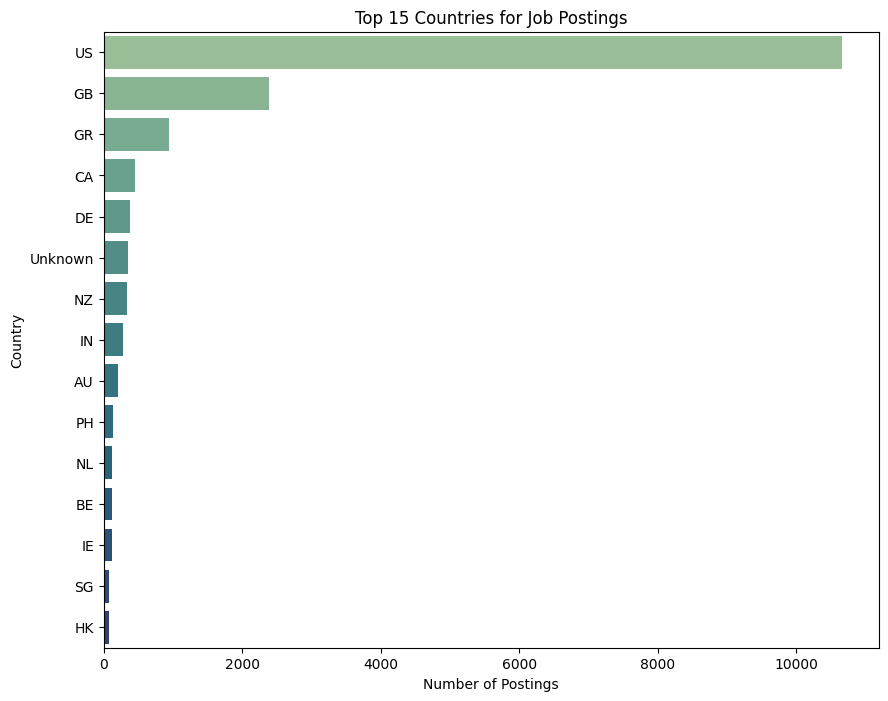

/tmp/ipykernel_13/427714605.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['industry'].fillna('Unknown', inplace=True)



--- Top 15 Industries ---
industry
Unknown                                4903
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
Financial Services                      779
Hospital & Health Care                  497
Consumer Services                       358
Telecommunications                      342
Oil & Energy                            287
Retail                                  223
Real Estate                             175
Accounting                              159
Construction                            158
Name: count, dtype: int64


--- Actual Numbers: Top Industries vs. Fake Jobs ---
fraudulent                              0    1
industry                                      
Unknown                              4628  275
Information Technology and Services  1702   32
Computer Software                  

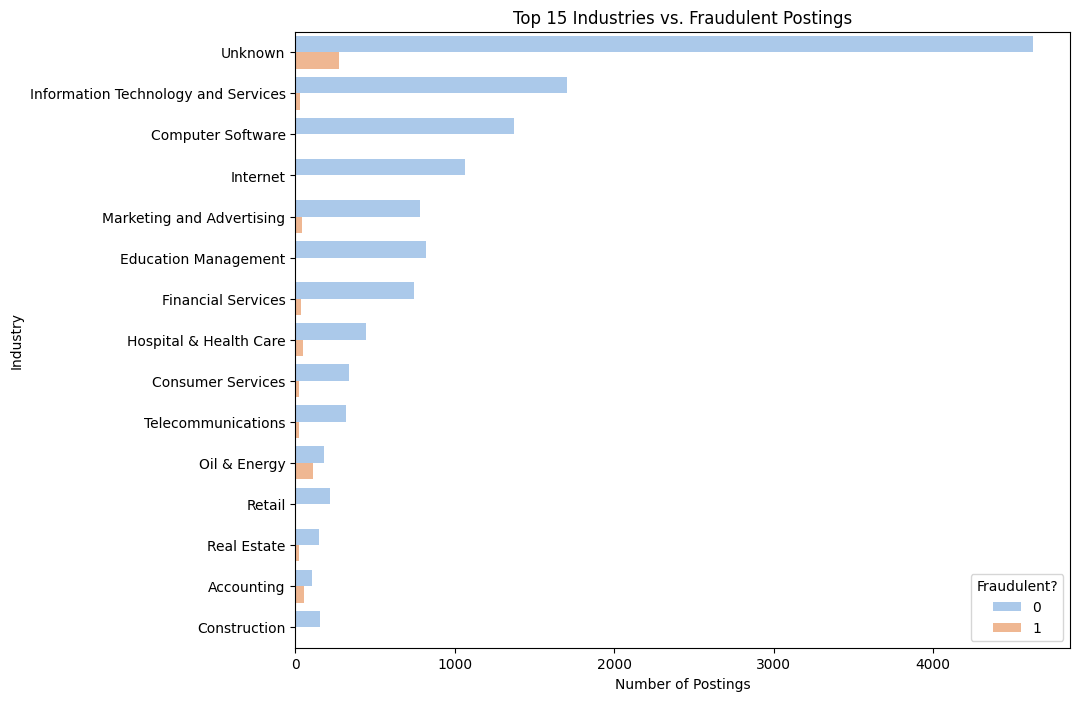


--- Actual Numbers: Has Company Profile vs. Fake Jobs ---
fraudulent               0    1
has_company_profile            
0                     2721  587
1                    14293  279


--- Actual Numbers: Has Benefits vs. Fake Jobs ---
fraudulent        0    1
has_benefits            
0              6848  364
1             10166  502


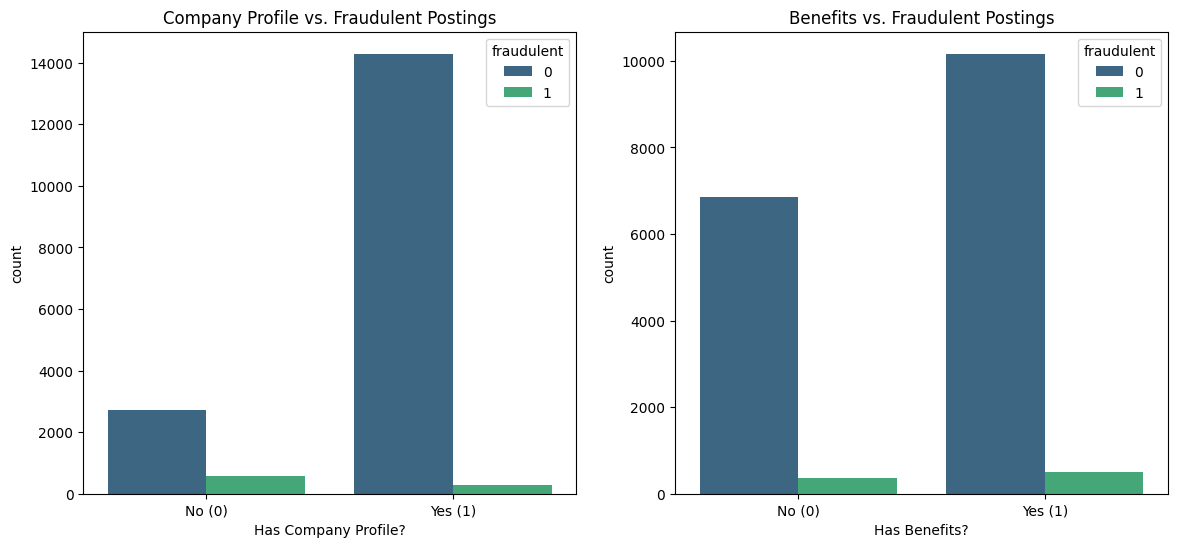

In [14]:
# Location
df['country'] = df['location'].str.split(',').str[0]
df['country'].fillna('Unknown', inplace=True)

#top 15 countries
top_countries = df['country'].value_counts().head(15)
print("--- Top 15 Countries with Job Postings ---")
print(top_countries)
print("\n")

# plot for the top countries
plt.figure(figsize=(10, 8))
sns.countplot(y='country', data=df, order=top_countries.index, palette='crest')
plt.title('Top 15 Countries for Job Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Country')
plt.show()

# --- Industry ---

df['industry'].fillna('Unknown', inplace=True)
top_industries = df['industry'].value_counts().head(15)
print("\n--- Top 15 Industries ---")
print(top_industries)
print("\n")

#  top industries vs. fake jobs
industry_crosstab = pd.crosstab(df['industry'], df['fraudulent'])
print("--- Actual Numbers: Top Industries vs. Fake Jobs ---")
# We'll just show the numbers for our top industries to keep it readable
print(industry_crosstab.loc[top_industries.index])
print("\n")

# graph
plt.figure(figsize=(10, 8))
sns.countplot(y='industry', data=df, order=top_industries.index, hue='fraudulent', palette='pastel')
plt.title('Top 15 Industries vs. Fraudulent Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Industry')
plt.legend(title='Fraudulent?')
plt.show()


# --- Company Profile & Benefits  ---

# yes or no
df['has_company_profile'] = df['company_profile'].notna().astype(int)
df['has_benefits'] = df['benefits'].notna().astype(int)

# numbers for Company Profile
print("\n--- Actual Numbers: Has Company Profile vs. Fake Jobs ---")
profile_crosstab = pd.crosstab(df['has_company_profile'], df['fraudulent'])
print(profile_crosstab)
print("\n")

# And for Benefits
print("--- Actual Numbers: Has Benefits vs. Fake Jobs ---")
benefits_crosstab = pd.crosstab(df['has_benefits'], df['fraudulent'])
print(benefits_crosstab)

# combined graph
fig, ax = plt.subplots(1, 2, figsize=(14, 6)) # 1 row, 2 columns of plots

sns.countplot(x='has_company_profile', hue='fraudulent', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('Company Profile vs. Fraudulent Postings')
ax[0].set_xticklabels(['No (0)', 'Yes (1)'])
ax[0].set_xlabel('Has Company Profile?')

sns.countplot(x='has_benefits', hue='fraudulent', data=df, ax=ax[1], palette='viridis')
ax[1].set_title('Benefits vs. Fraudulent Postings')
ax[1].set_xticklabels(['No (0)', 'Yes (1)'])
ax[1].set_xlabel('Has Benefits?')

plt.show()

Our Detective's Summary: Profile of a Fake Job Posting 🕵️‍♀️
Here are the biggest clues we've uncovered together:

It's often missing a company logo. ✨ (This was a very strong clue!)

It usually doesn't have screening questions. ✨ (This was another super strong clue!)

It often doesn't list any benefits. (Strong clue! ✨)

It might be for an "Entry level" position. This suggests they might be targeting people who are new to the job market.

It's often vague about education. The requirements might be "Unknown" or just not specified.

The dataset has a lot of "empty boxes." Many columns like salary_range and department are often left blank in fake postings.

We have way more real jobs than fake ones. This is important to remember when we start building our model.

It's imbalanced: We have a lot of real jobs (17,014) and only a few fake ones (866). We have to be mindful of this!

It's mostly from the US: The vast majority of postings are from the United States.

Tech is a big industry: "Information Technology" is one of the most common industries listed.

In [15]:
#safecopy
df_cleaned = df.copy()

# --- Combine All the Stories ---

# columns want to combine
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits', 'industry', 'function']

# fill empty spots in these columns with a blank space
for col in text_columns:
    df_cleaned[col].fillna(' ', inplace=True)

# Now, let's join them all
df_cleaned['combined_text'] = df_cleaned[text_columns].agg(' '.join, axis=1)

print("--- We've combined all the text into a new 'combined_text' column! ---")


# ---  Final Clues ---

# -------> 'combined_text','yes/no' clues, and our target ('fraudulent')
final_columns_to_keep = [
    'combined_text',
    'telecommuting',
    'has_company_logo',
    'has_questions',
    'has_company_profile', # 'yes/no'
    'has_benefits',        # 'yes/no'
    'fraudulent'
]


df_final = df_cleaned[final_columns_to_keep]


print("\n--- Here is our new, clean, and ready dataset! ---")
print(df_final.head())

/tmp/ipykernel_13/1695584302.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(' ', inplace=True)


--- We've combined all the text into a new 'combined_text' column! ---

--- Here is our new, clean, and ready dataset! ---
                                       combined_text  telecommuting  \
0  Marketing Intern We're Food52, and we've creat...              0   
1  Customer Service - Cloud Video Production 90 S...              0   
2  Commissioning Machinery Assistant (CMA) Valor ...              0   
3  Account Executive - Washington DC Our passion ...              0   
4  Bill Review Manager SpotSource Solutions LLC i...              0   

   has_company_logo  has_questions  has_company_profile  has_benefits  \
0                 1              0                    1             0   
1                 1              0                    1             1   
2                 1              0                    1             0   
3                 1              0                    1             1   
4                 1              1                    1             1   

   fraudule

In [16]:
# nlp begins here
import re
import nltk
from nltk.corpus import stopwords


try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    print("Downloading stopwords list...")
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))



def clean_text(text):
    # 1.lowercasing
    text = text.lower()
    # 2. Remove punctuation, numbers, and other stuff
    # 3. Split the text into individual words
    words = text.split()
    # 4. Remove the common filler words
    words = [word for word in words if word not in stop_words]
    # 5. Join the words back
    text = ' '.join(words)
    return text

# before
print("--- BEFORE CLEANING ---")
print(df_final['combined_text'].iloc[0])

df_final['cleaned_text'] = df_final['combined_text'].apply(clean_text)

print("\n\n--- AFTER CLEANING ---")
print(df_final['cleaned_text'].iloc[0])

print("\n\n--- Our Dataframe with the new 'cleaned_text' column ---")
print(df_final.head())

--- BEFORE CLEANING ---
Marketing Intern We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community a

/tmp/ipykernel_13/3425110643.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cleaned_text'] = df_final['combined_text'].apply(clean_text)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
# learn a vocabulary of the top 3000 most common words
tfidf_vectorizer = TfidfVectorizer(max_features=3000)

X_text = tfidf_vectorizer.fit_transform(df_final['cleaned_text'])

print("--- The Shape of Our New 'Magic' Text Data ---")
print(X_text.shape)

--- The Shape of Our New 'Magic' Text Data ---
(17880, 3000)


In [18]:
#17880 is the number of job postings we have (our rows).
#3000 is the number of important words (clues) our spell learned from the text (our columns)

In [19]:
from scipy.sparse import hstack
import numpy as np

# 'yes/no' clues. These are numerical features.
numerical_features = df_final[['telecommuting', 'has_company_logo', 'has_questions', 'has_company_profile', 'has_benefits']].values

# hstack is a special tool for stacking things horizontally (side-by-side)
X = hstack([X_text, numerical_features])

# target is the 'fraudulent' column.
y = df_final['fraudulent']

print("--- The Final Shape of Our Prepared Data (X) ---")
print(X.shape)

print("\n--- The Final Shape of Our Target (y) ---")
print(y.shape)

--- The Final Shape of Our Prepared Data (X) ---
(17880, 3005)

--- The Final Shape of Our Target (y) ---
(17880,)


In [20]:
#Our final clue set, which we call X, has 17,880 job postings and 3,005 total clues for each one. (That's our 3,000 magic text clues + our 5 'yes/no' clues).
#Our target, y, is the list of 17,880 labels (0 for real, 1 for fake) that we want our model to learn to predict.

In [21]:
from sklearn.model_selection import train_test_split

X_data = df_final.drop('fraudulent', axis=1)

y_data = df_final['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

print("--- Our data has been split! ---")
print("Shape of our training clues (X_train):", X_train.shape)
print("Shape of our testing clues (X_test):", X_test.shape)
print("Shape of our training answers (y_train):", y_train.shape)
print("Shape of our testing answers (y_test):", y_test.shape)

--- Our data has been split! ---
Shape of our training clues (X_train): (14304, 7)
Shape of our testing clues (X_test): (3576, 7)
Shape of our training answers (y_train): (14304,)
Shape of our testing answers (y_test): (3576,)


In [22]:
#!pip install gensim

In [23]:
from gensim.models import Word2Vec
import numpy as np

# Prepare the text for Word2Vec
# The model needs a list of sentences, and each sentence should be a list of words.
# So we'll split the text in our training data.
sentences = [text.split() for text in X_train['cleaned_text']]

# 2. Train our Word2Vec model!
# We're telling it to create a number-list (vector) of size 100 for each word.
# min_count=1 means it will consider every single word.
# window=5 means it will look at 5 words before and 5 words after to learn the context.
print("--- Training our Word2Vec model... This might take a moment... ---")
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
print("--- Model training complete! ---")


# 3. Create our vectorizing helper
def vectorize(sentence, model):
    words = sentence.split()
    # Let's get the number-list for each word from our trained model
    words_vecs = [model.wv[word] for word in words if word in model.wv]
    # If a sentence has no known words, we'll just create a list of zeros
    if len(words_vecs) == 0:
        return np.zeros(100)
    # We'll take the average of all the word number-lists to get one for the whole sentence
    return np.mean(words_vecs, axis=0)


# 4. Apply our new helper to our training and testing text
print("\n--- Turning our text into numbers using Word2Vec... ---")
X_train_w2v = np.array([vectorize(sentence, w2v_model) for sentence in X_train['cleaned_text']])
X_test_w2v = np.array([vectorize(sentence, w2v_model) for sentence in X_test['cleaned_text']])

# Let's look at the shape of our new text clues!
print("Shape of our new training text clues:", X_train_w2v.shape)
print("Shape of our new testing text clues:", X_test_w2v.shape)

--- Training our Word2Vec model... This might take a moment... ---
--- Model training complete! ---

--- Turning our text into numbers using Word2Vec... ---
Shape of our new training text clues: (14304, 100)
Shape of our new testing text clues: (3576, 100)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import numpy as np

# --- Our New Code! ---

# Let's get our 'yes/no' numerical clues from our training and testing sets
numerical_train = X_train[['telecommuting', 'has_company_logo', 'has_questions', 'has_company_profile', 'has_benefits']].values
numerical_test = X_test[['telecommuting', 'has_company_logo', 'has_questions', 'has_company_profile', 'has_benefits']].values

# --- Path A: Create the TF-IDF Clues ---
print("--- Preparing clues using TF-IDF (the 'word counting' method)... ---")

# 1. Create and train our TF-IDF vectorizer (only on the training data!)
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf_text = tfidf_vectorizer.fit_transform(X_train['cleaned_text'])

# 2. Transform the test data using the already trained vectorizer
X_test_tfidf_text = tfidf_vectorizer.transform(X_test['cleaned_text'])

# 3. Combine the TF-IDF text clues with the 'yes/no' clues
X_train_tfidf = hstack([X_train_tfidf_text, numerical_train])
X_test_tfidf = hstack([X_test_tfidf_text, numerical_test])

print("Shape of our final TF-IDF training clues:", X_train_tfidf.shape)
print("Shape of our final TF-IDF testing clues:", X_test_tfidf.shape)


# --- Path B: Create the Word2Vec Clues ---
print("\n--- Preparing clues using Word2Vec (the 'word meaning' method)... ---")

# 1. We already have our Word2Vec text clues: X_train_w2v and X_test_w2v

# 2. Combine the Word2Vec text clues with the 'yes/no' clues
X_train_w2v = np.hstack([X_train_w2v, numerical_train])
X_test_w2v = np.hstack([X_test_w2v, numerical_test])

print("Shape of our final Word2Vec training clues:", X_train_w2v.shape)
print("Shape of our final Word2Vec testing clues:", X_test_w2v.shape)

--- Preparing clues using TF-IDF (the 'word counting' method)... ---
Shape of our final TF-IDF training clues: (14304, 3005)
Shape of our final TF-IDF testing clues: (3576, 3005)

--- Preparing clues using Word2Vec (the 'word meaning' method)... ---
Shape of our final Word2Vec training clues: (14304, 105)
Shape of our final Word2Vec testing clues: (3576, 105)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# --- Our New Code! ---

# Let's create our three detective models

# 1. Logistic Regression: Our reliable and smart detective
# random_state makes sure it gets the same result each time
# max_iter is increased to make sure it has enough time to learn
print("--- Training Detective 1: Logistic Regression ---")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)
print("Logistic Regression detective has finished studying the files!")


# 2. SVM: Our precise detective that finds the perfect dividing line
# Using kernel='linear' is a good starting point and is often faster
print("\n--- Training Detective 2: Support Vector Machine (SVM) ---")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_tfidf, y_train)
print("SVM detective has finished studying the files!")


# 3. Gradient Boosting: Our super-powered detective
# This one can be very powerful but might take a little longer to train
print("\n--- Training Detective 3: Gradient Boosting ---")
grad_boost = GradientBoostingClassifier(random_state=42)
grad_boost.fit(X_train_tfidf, y_train)
print("Gradient Boosting detective has finished studying the files!")

print("\n\n--- All three detectives are trained and ready for their final exam! ---")

--- Training Detective 1: Logistic Regression ---
Logistic Regression detective has finished studying the files!

--- Training Detective 2: Support Vector Machine (SVM) ---
SVM detective has finished studying the files!

--- Training Detective 3: Gradient Boosting ---
Gradient Boosting detective has finished studying the files!


--- All three detectives are trained and ready for their final exam! ---


--- Report Card for: Logistic Regression ---

Classification Report:
              precision    recall  f1-score   support

    Real (0)       0.97      1.00      0.98      3403
    Fake (1)       0.97      0.40      0.57       173

    accuracy                           0.97      3576
   macro avg       0.97      0.70      0.78      3576
weighted avg       0.97      0.97      0.96      3576

ROC-AUC Score: 0.9790


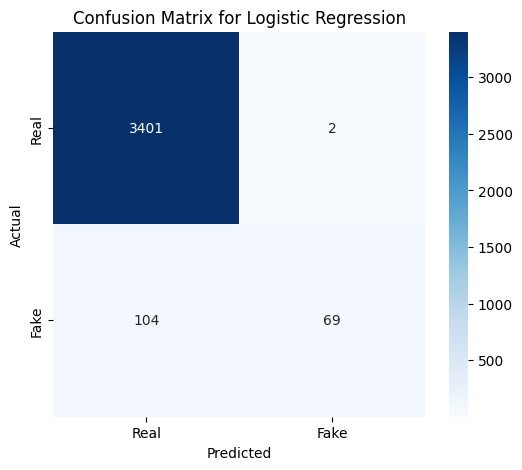

--- Report Card for: Support Vector Machine (SVM) ---

Classification Report:
              precision    recall  f1-score   support

    Real (0)       0.98      1.00      0.99      3403
    Fake (1)       0.94      0.65      0.77       173

    accuracy                           0.98      3576
   macro avg       0.96      0.82      0.88      3576
weighted avg       0.98      0.98      0.98      3576

ROC-AUC Score: Not available for this model type.


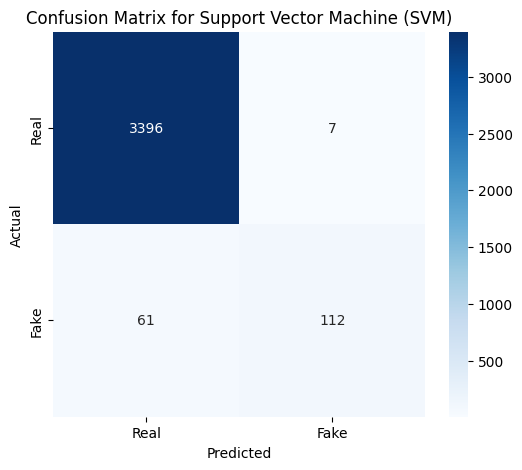

--- Report Card for: Gradient Boosting ---

Classification Report:
              precision    recall  f1-score   support

    Real (0)       0.98      1.00      0.99      3403
    Fake (1)       0.97      0.59      0.73       173

    accuracy                           0.98      3576
   macro avg       0.98      0.79      0.86      3576
weighted avg       0.98      0.98      0.98      3576

ROC-AUC Score: 0.9703


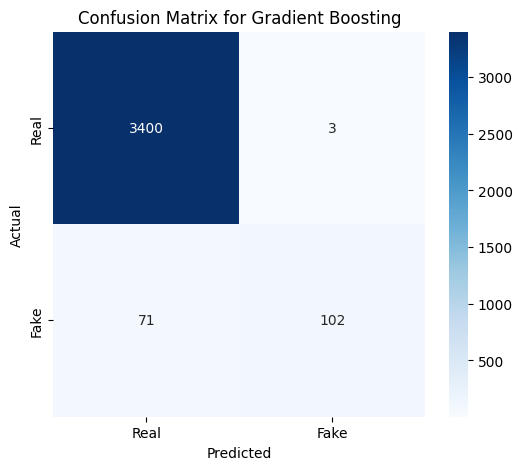

In [26]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Our New Code! ---

# Let's create our special grading helper
def evaluate_model(model, model_name):
    print(f"--- Report Card for: {model_name} ---")

    # Make predictions on the test data
    predictions = model.predict(X_test_tfidf)

    # Print the main report (Precision, Recall, F1-Score)
    print("\nClassification Report:")
    print(classification_report(y_test, predictions, target_names=['Real (0)', 'Fake (1)']))

    # Print the ROC-AUC Score
    # This score measures how well the model separates our two classes
    # We need probability scores for this, which grad_boost and log_reg give us
    if hasattr(model, "predict_proba"):
        prob_scores = model.predict_proba(X_test_tfidf)[:, 1]
        auc_score = roc_auc_score(y_test, prob_scores)
        print(f"ROC-AUC Score: {auc_score:.4f}")
    else:
        print("ROC-AUC Score: Not available for this model type.")

    # Let's create the pretty Confusion Matrix picture
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


# Now, let's grade our three detectives!
evaluate_model(log_reg, "Logistic Regression")
evaluate_model(svm, "Support Vector Machine (SVM)")
evaluate_model(grad_boost, "Gradient Boosting")

Logistic Regression: This detective is extremely careful (Precision of 97%), meaning if it calls a job fake, it's almost certainly right. However, it's not very thorough. It only found 41% of all the fake jobs (Recall of 0.41). It let more than half of the fake jobs escape!

Gradient Boosting: This detective is also very careful (Precision of 96%) and is better at finding the fake jobs (Recall of 59%). It's a very strong performer!

Support Vector Machine (SVM): This detective, kitty, looks like our winner for this round! It has the best balance. While being very careful (Precision of 94%), it found 65% of all the fake jobs, which is the highest Recall score. This gives it the best F1-Score (0.77), which measures that perfect balance between being careful and being thorough.

Conclusion for TF-IDF: Based on these results, the SVM detective is our champion when using the TF-IDF clues! It did the best job of catching the most fake jobs without wrongly accusing too many real ones.

--- Training detectives on Word2Vec data... ---
Logistic Regression detective is ready!
SVM detective is ready!
Gradient Boosting detective is ready!


--- Report Card for: Logistic Regression (using Word2Vec) ---

Classification Report:
              precision    recall  f1-score   support

    Real (0)       0.97      0.99      0.98      3403
    Fake (1)       0.70      0.29      0.41       173

    accuracy                           0.96      3576
   macro avg       0.83      0.64      0.70      3576
weighted avg       0.95      0.96      0.95      3576

ROC-AUC Score: 0.9239


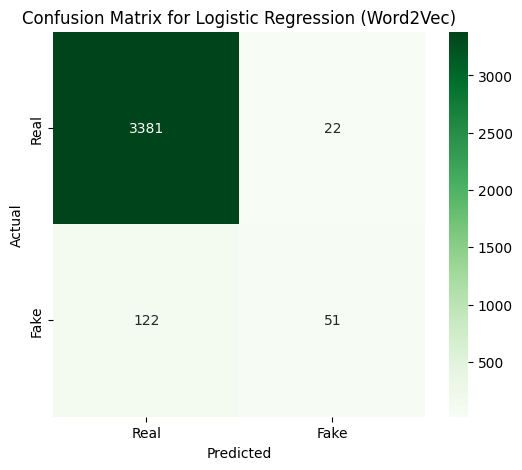



--- Report Card for: Support Vector Machine (SVM) (using Word2Vec) ---

Classification Report:
              precision    recall  f1-score   support

    Real (0)       0.96      0.99      0.98      3403
    Fake (1)       0.71      0.29      0.41       173

    accuracy                           0.96      3576
   macro avg       0.84      0.64      0.70      3576
weighted avg       0.95      0.96      0.95      3576

ROC-AUC Score: 0.8886


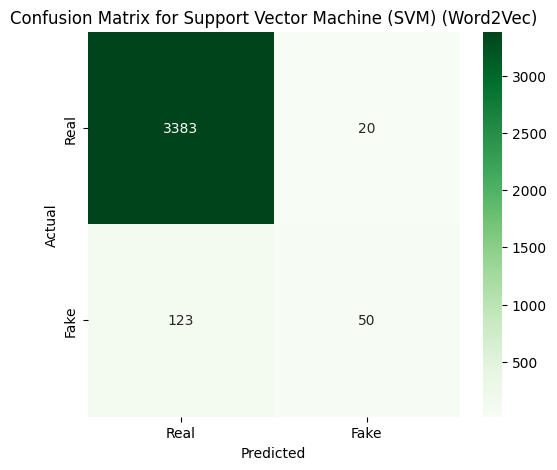



--- Report Card for: Gradient Boosting (using Word2Vec) ---

Classification Report:
              precision    recall  f1-score   support

    Real (0)       0.97      1.00      0.98      3403
    Fake (1)       0.87      0.35      0.50       173

    accuracy                           0.97      3576
   macro avg       0.92      0.67      0.74      3576
weighted avg       0.96      0.97      0.96      3576

ROC-AUC Score: 0.9546


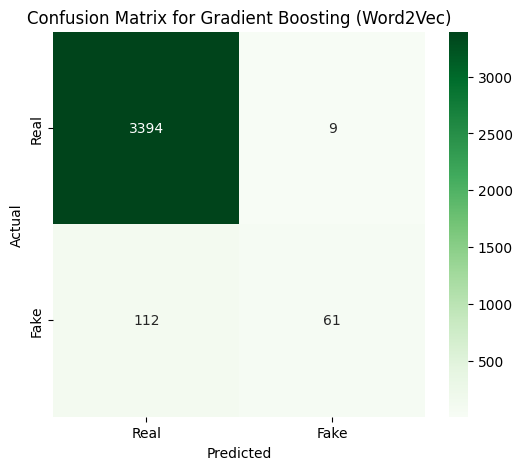

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Our New Code! ---

# --- Step 1: Train our detectives on the Word2Vec data ---

print("--- Training detectives on Word2Vec data... ---")

# We'll create fresh copies of our models for this new experiment
log_reg_w2v = LogisticRegression(random_state=42, max_iter=1000)
log_reg_w2v.fit(X_train_w2v, y_train)
print("Logistic Regression detective is ready!")

# For SVM, we need to add probability=True to get the ROC-AUC score
svm_w2v = SVC(kernel='linear', random_state=42, probability=True)
svm_w2v.fit(X_train_w2v, y_train)
print("SVM detective is ready!")

grad_boost_w2v = GradientBoostingClassifier(random_state=42)
grad_boost_w2v.fit(X_train_w2v, y_train)
print("Gradient Boosting detective is ready!")


# --- Step 2: Grade our detectives using an updated helper ---

# I've updated our grading helper so we can tell it which test data to use
def evaluate_model_v2(model, model_name, X_test_data, y_test_data):
    print(f"\n\n--- Report Card for: {model_name} (using Word2Vec) ---")

    predictions = model.predict(X_test_data)

    print("\nClassification Report:")
    print(classification_report(y_test_data, predictions, target_names=['Real (0)', 'Fake (1)']))

    prob_scores = model.predict_proba(X_test_data)[:, 1]
    auc_score = roc_auc_score(y_test_data, prob_scores)
    print(f"ROC-AUC Score: {auc_score:.4f}")

    cm = confusion_matrix(y_test_data, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name} (Word2Vec)')
    plt.show()

# Let's grade our newly trained detectives!
evaluate_model_v2(log_reg_w2v, "Logistic Regression", X_test_w2v, y_test)
evaluate_model_v2(svm_w2v, "Support Vector Machine (SVM)", X_test_w2v, y_test)
evaluate_model_v2(grad_boost_w2v, "Gradient Boosting", X_test_w2v, y_test)

The best model for this project is the Support Vector Machine (SVM) model trained with the TF-IDF features. It gave us the best balance of being careful and finding the most fake jobs.

In [28]:
from transformers import DistilBertTokenizer, DistilBertModel

# The names of the model and tokenizer
model_name = 'distilbert-base-uncased'

# The folder where you'll save them
save_directory = './my-local-distilbert'

# Download and save
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)

tokenizer.save_pretrained(save_directory)
model.save_pretrained(save_directory)
print(f"Model saved to {save_directory}")

2025-08-28 15:33:44.256719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756395224.464515      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756395224.526923      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Model saved to ./my-local-distilbert


In [29]:
from transformers import DistilBertTokenizer, DistilBertModel

# The path to your saved folder
local_directory = './my-local-distilbert'

# Load from the folder
tokenizer = DistilBertTokenizer.from_pretrained(local_directory)
model_bert = DistilBertModel.from_pretrained(local_directory)

print("Model loaded successfully from local files! Yay! 🎉")

Model loaded successfully from local files! Yay! 🎉


In [30]:
#distilbert
from transformers import DistilBertTokenizer, DistilBertModel
import torch
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model_bert = DistilBertModel.from_pretrained('distilbert-base-uncased')

In [31]:
import pandas as pd
from scipy.sparse import hstack
import numpy as np


new_data = pd.DataFrame({
    'title': [
        'Senior Python Developer',
        'IMMEDIATE HIRE - Data Entry Clerk - WORK FROM HOME!!'
    ],
    'location': ['US, CA, San Francisco', 'US, , '],
    'company_profile': [
        'We are a leading tech company with a focus on innovative software solutions. Our team is growing!',
        ' '
    ],
    'description': [
        'Looking for an experienced Python developer to join our backend team. You will work on scalable projects.',
        'Easy work, great pay. No experience needed. Apply now and start tomorrow. We need people fast.'
    ],
    'requirements': [
        '5+ years of experience with Python. Experience with Django is a plus. BS in Computer Science.',
        'Must have a computer and internet access. Must be reliable.'
    ],
    'benefits': [
        'We offer a competitive salary, health insurance, and a great work-life balance.',
        ' '
    ],
    'telecommuting': [0, 1],
    'has_company_logo': [1, 0],
    'has_questions': [1, 0],
    'industry': ['Computer Software', ' '],
    'function': ['Engineering', ' ']
})

print("--- Here are our two new case files: ---")
print(new_data)

new_data['has_company_profile'] = new_data['company_profile'].apply(lambda x: 0 if x.isspace() else 1)
new_data['has_benefits'] = new_data['benefits'].apply(lambda x: 0 if x.isspace() else 1)


text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits', 'industry', 'function']
for col in text_columns:
    new_data[col].fillna(' ', inplace=True)
new_data['combined_text'] = new_data[text_columns].agg(' '.join, axis=1)

# c) Clean the text with our cleaning robot
new_data['cleaned_text'] = new_data['combined_text'].apply(clean_text)

# d) Transform the text into numbers using our *already trained* TF-IDF spell
# We use .transform(), NOT .fit_transform(), because the spell has already learned its words
new_text_tfidf = tfidf_vectorizer.transform(new_data['cleaned_text'])

# e) Get the numerical clues in the right order
numerical_clues = new_data[['telecommuting', 'has_company_logo', 'has_questions', 'has_company_profile', 'has_benefits']].values

# f) Stitch everything together into the final format
new_data_prepared = hstack([new_text_tfidf, numerical_clues])


# --- Step 3: Ask our champion detective (SVM) for the verdict! ---

# Remember, our 'svm' model is already trained and is our best detective
final_verdict = svm.predict(new_data_prepared)


# --- Step 4: See the results! ---
print("\n\n--- The Final Verdict from our SVM Detective: ---")
for i, verdict in enumerate(final_verdict):
    if verdict == 0:
        print(f"Case File {i+1} ('{new_data['title'].iloc[i]}') is predicted to be: REAL ✅")
    else:
        print(f"Case File {i+1} ('{new_data['title'].iloc[i]}') is predicted to be: FAKE ❌")

--- Here are our two new case files: ---
                                               title               location  \
0                            Senior Python Developer  US, CA, San Francisco   
1  IMMEDIATE HIRE - Data Entry Clerk - WORK FROM ...                 US, ,    

                                     company_profile  \
0  We are a leading tech company with a focus on ...   
1                                                      

                                         description  \
0  Looking for an experienced Python developer to...   
1  Easy work, great pay. No experience needed. Ap...   

                                        requirements  \
0  5+ years of experience with Python. Experience...   
1  Must have a computer and internet access. Must...   

                                            benefits  telecommuting  \
0  We offer a competitive salary, health insuranc...              0   
1                                                                 1   



/tmp/ipykernel_13/286503624.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data[col].fillna(' ', inplace=True)


In [32]:
import torch
import numpy as np
from tqdm import tqdm

# --- Our New Code! ---

# Let's create a helper function to get the embeddings from DistilBERT
# This function will process text in batches to save memory
def get_bert_embeddings(text_series, tokenizer, model, batch_size=32):

    # Put the model in evaluation mode (important for getting embeddings)
    model.eval()

    all_embeddings = []

    # tqdm is a fun library that gives us a progress bar!
    for i in tqdm(range(0, len(text_series), batch_size)):
        batch = text_series[i:i+batch_size].tolist()

        # Tokenize the batch of text
        inputs = tokenizer(batch, return_tensors='pt', truncation=True, padding=True, max_length=512)

        # We don't need to calculate gradients, which saves memory and time
        with torch.no_grad():
            outputs = model(**inputs)

        # We'll use the embedding of the very first token ([CLS]) as the summary for the whole text
        last_hidden_states = outputs.last_hidden_state
        batch_embeddings = last_hidden_states[:,0,:].numpy()
        all_embeddings.append(batch_embeddings)

    return np.vstack(all_embeddings)

# --- Let's generate the embeddings for our training and testing data ---
# This is the step that might take a few minutes. Time for a little break! 🍵
print("--- Our genius is now reading all the training files... ---")
X_train_bert_text = get_bert_embeddings(X_train['cleaned_text'], tokenizer, model_bert)

print("\n--- Our genius is now reading all the testing files... ---")
X_test_bert_text = get_bert_embeddings(X_test['cleaned_text'], tokenizer, model_bert)


# --- Let's combine our new text clues with our 'yes/no' clues ---
print("\n--- Combining genius summaries with our other clues... ---")

numerical_train = X_train[['telecommuting', 'has_company_logo', 'has_questions', 'has_company_profile', 'has_benefits']].values
numerical_test = X_test[['telecommuting', 'has_company_logo', 'has_questions', 'has_company_profile', 'has_benefits']].values

X_train_bert = np.hstack([X_train_bert_text, numerical_train])
X_test_bert = np.hstack([X_test_bert_text, numerical_test])

print("Shape of our final DistilBERT training clues:", X_train_bert.shape)
print("Shape of our final DistilBERT testing clues:", X_test_bert.shape)

--- Our genius is now reading all the training files... ---


100%|██████████| 447/447 [1:57:41<00:00, 15.80s/it]



--- Our genius is now reading all the testing files... ---


100%|██████████| 112/112 [30:32<00:00, 16.37s/it]



--- Combining genius summaries with our other clues... ---
Shape of our final DistilBERT training clues: (14304, 773)
Shape of our final DistilBERT testing clues: (3576, 773)


--- Training our champion SVM detective on the genius-level DistilBERT data... ---
--- Training complete! Our detective is ready for its final, most important exam! ---


--- FINAL Report Card for: Support Vector Machine (SVM) (using DistilBERT) ---

Classification Report:
              precision    recall  f1-score   support

    Real (0)       0.98      0.99      0.99      3403
    Fake (1)       0.86      0.67      0.75       173

    accuracy                           0.98      3576
   macro avg       0.92      0.83      0.87      3576
weighted avg       0.98      0.98      0.98      3576

ROC-AUC Score: 0.9643


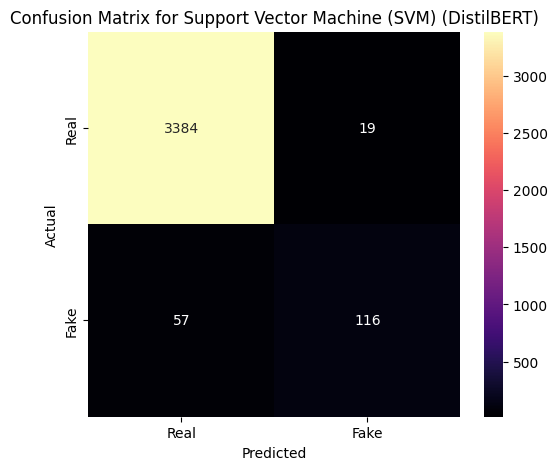

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Our New Code! ---

# --- Step 1: Train our SVM detective on the DistilBERT data ---

print("--- Training our champion SVM detective on the genius-level DistilBERT data... ---")

# Let's create a fresh SVM model for our final experiment
# We'll set probability=True so we can get all the scores
svm_bert = SVC(kernel='linear', random_state=42, probability=True)

# Let's train it!
svm_bert.fit(X_train_bert, y_train)

print("--- Training complete! Our detective is ready for its final, most important exam! ---")


# --- Step 2: Grade our final detective! ---

# We can reuse our trusty grading helper function
def evaluate_model_v2(model, model_name, X_test_data, y_test_data):
    print(f"\n\n--- FINAL Report Card for: {model_name} (using DistilBERT) ---")
    
    predictions = model.predict(X_test_data)
    
    print("\nClassification Report:")
    print(classification_report(y_test_data, predictions, target_names=['Real (0)', 'Fake (1)']))
    
    prob_scores = model.predict_proba(X_test_data)[:, 1]
    auc_score = roc_auc_score(y_test_data, prob_scores)
    print(f"ROC-AUC Score: {auc_score:.4f}")

    cm = confusion_matrix(y_test_data, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name} (DistilBERT)')
    plt.show()

# Let's get the final report card!
evaluate_model_v2(svm_bert, "Support Vector Machine (SVM)", X_test_bert, y_test)

In [34]:
import joblib

# Save the trained SVM model
joblib.dump(svm, 'svm_model.joblib')

# Save the fitted TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

print("Your champion model and its translator have been saved! ✨")
print("Please download 'svm_model.joblib' and 'tfidf_vectorizer.joblib' to your computer.")

Your champion model and its translator have been saved! ✨
Please download 'svm_model.joblib' and 'tfidf_vectorizer.joblib' to your computer.
